<a href="https://colab.research.google.com/github/dssemugabi/AI-and-Nearal-networks/blob/main/big_data_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Sales Data

In [ ]:
import pandas as pd
df = pd.read_csv("transactions.csv", parse_dates=["date"])
df.head()

,date,product,store,quantity,price
0,2024-01-27,T-Shirt,S3,6,23
1,2024-01-01,Shoes,S3,9,54
2,2024-01-22,Shoes,S3,1,45
3,2024-01-20,T-Shirt,S2,8,27
4,2024-01-01,T-Shirt,S2,2,20


Clean the Data

In [ ]:
df = df.dropna()
# Remove invalid rows
df = df[(df["price"] > 0) & (df["quantity"] > 0)]
# Ensure correct types
df["price"] = df["price"].astype(float)
df["quantity"] = df["quantity"].astype(int)
df.head()

,date,product,store,quantity,price,revenue,month
0,2024-01-27,T-Shirt,S3,6,23.0,138.0,2024-01
1,2024-01-01,Shoes,S3,9,54.0,486.0,2024-01
2,2024-01-22,Shoes,S3,1,45.0,45.0,2024-01
3,2024-01-20,T-Shirt,S2,8,27.0,216.0,2024-01
4,2024-01-01,T-Shirt,S2,2,20.0,40.0,2024-01


Calculate Revenue

In [ ]:
df["revenue"] = df["price"] * df["quantity"]
df.head()

,date,product,store,quantity,price,revenue
0,2024-01-27,T-Shirt,S3,6,23.0,138.0
1,2024-01-01,Shoes,S3,9,54.0,486.0
2,2024-01-22,Shoes,S3,1,45.0,45.0
3,2024-01-20,T-Shirt,S2,8,27.0,216.0
4,2024-01-01,T-Shirt,S2,2,20.0,40.0


Group by Month and Category

In [ ]:
df["month"] = df["date"].dt.to_period("M")
monthly_revenue = df.groupby("month")["revenue"].sum().reset_index()
monthly_revenue

,month,revenue
0,2024-01,406526.0


In [ ]:
df = df.merge(products, on='product', how='left')
category_revenue = df.groupby("category")["revenue"].sum().reset_index()
category_revenue

,category,revenue
0,Clothing,16781.0
1,Electronics,389745.0


Plotting Charts

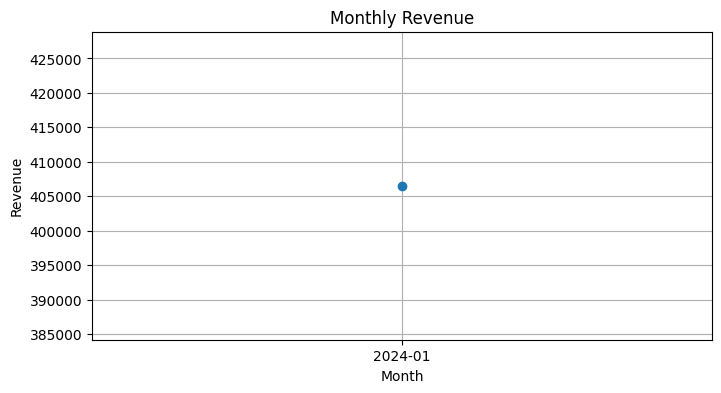

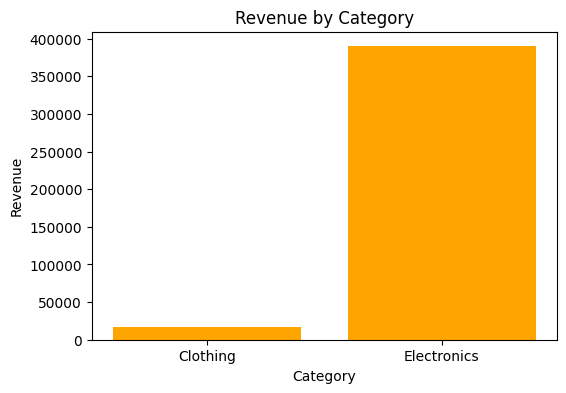

In [ ]:
import matplotlib.pyplot as plt

# Monthly revenue chart
plt.figure(figsize=(8,4))
plt.plot(monthly_revenue["month"].astype(str), monthly_revenue["revenue"], marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# Category revenue chart
plt.figure(figsize=(6,4))
plt.bar(category_revenue["category"], category_revenue["revenue"], color="orange")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()